# 데이터 준비

In [1]:
import pandas as pd

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


# 데이터로더 구성

다음을 수행하게끔
- 데이터의 중복 제거
- NaN 결측치 제거
- 한국어 토크나이저로 토큰화
- 불용어(Stopwords) 제거
- 사전word_to_index 구성
- 텍스트 스트링을 사전 인덱스 스트링으로 변환
- X_train, y_train, X_test, y_test, word_to_index 리턴

In [2]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 

In [3]:
word_to_index = {k:(v+1) for k,v in word_to_index.items()}

In [4]:
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

In [5]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [6]:
index_to_word

{4: '',
 5: '.',
 6: '영화',
 7: '다',
 8: '고',
 9: '하',
 10: '을',
 11: '보',
 12: '..',
 13: '게',
 14: ',',
 15: '!',
 16: '지',
 17: '있',
 18: '없',
 19: '?',
 20: '좋',
 21: '나',
 22: '었',
 23: '만',
 24: '는데',
 25: '너무',
 26: '봤',
 27: '적',
 28: '안',
 29: '정말',
 30: '로',
 31: '음',
 32: '것',
 33: '아',
 34: '네요',
 35: '재밌',
 36: '어',
 37: '같',
 38: '점',
 39: '지만',
 40: '진짜',
 41: '했',
 42: '에서',
 43: '기',
 44: '네',
 45: '않',
 46: '거',
 47: '았',
 48: '수',
 49: '되',
 50: '면',
 51: 'ㅋㅋ',
 52: '말',
 53: '연기',
 54: '인',
 55: '주',
 56: '내',
 57: '최고',
 58: '~',
 59: '평점',
 60: '이런',
 61: '던',
 62: '어요',
 63: '할',
 64: '왜',
 65: '겠',
 66: '1',
 67: '스토리',
 68: '해',
 69: '습니다',
 70: 'ㅋㅋㅋ',
 71: '...',
 72: '드라마',
 73: '생각',
 74: '아니',
 75: '더',
 76: '그',
 77: '싶',
 78: '사람',
 79: '듯',
 80: '때',
 81: '감동',
 82: '함',
 83: '배우',
 84: '본',
 85: '까지',
 86: '뭐',
 87: '알',
 88: '만들',
 89: '내용',
 90: '볼',
 91: '감독',
 92: '보다',
 93: '라',
 94: '그냥',
 95: '재미',
 96: '시간',
 97: '지루',
 98: '중',
 99: '재미있',
 100:

In [7]:
word_to_index

{'': 4,
 '.': 5,
 '영화': 6,
 '다': 7,
 '고': 8,
 '하': 9,
 '을': 10,
 '보': 11,
 '..': 12,
 '게': 13,
 ',': 14,
 '!': 15,
 '지': 16,
 '있': 17,
 '없': 18,
 '?': 19,
 '좋': 20,
 '나': 21,
 '었': 22,
 '만': 23,
 '는데': 24,
 '너무': 25,
 '봤': 26,
 '적': 27,
 '안': 28,
 '정말': 29,
 '로': 30,
 '음': 31,
 '것': 32,
 '아': 33,
 '네요': 34,
 '재밌': 35,
 '어': 36,
 '같': 37,
 '점': 38,
 '지만': 39,
 '진짜': 40,
 '했': 41,
 '에서': 42,
 '기': 43,
 '네': 44,
 '않': 45,
 '거': 46,
 '았': 47,
 '수': 48,
 '되': 49,
 '면': 50,
 'ㅋㅋ': 51,
 '말': 52,
 '연기': 53,
 '인': 54,
 '주': 55,
 '내': 56,
 '최고': 57,
 '~': 58,
 '평점': 59,
 '이런': 60,
 '던': 61,
 '어요': 62,
 '할': 63,
 '왜': 64,
 '겠': 65,
 '1': 66,
 '스토리': 67,
 '해': 68,
 '습니다': 69,
 'ㅋㅋㅋ': 70,
 '...': 71,
 '드라마': 72,
 '생각': 73,
 '아니': 74,
 '더': 75,
 '그': 76,
 '싶': 77,
 '사람': 78,
 '듯': 79,
 '때': 80,
 '감동': 81,
 '함': 82,
 '배우': 83,
 '본': 84,
 '까지': 85,
 '뭐': 86,
 '알': 87,
 '만들': 88,
 '내용': 89,
 '볼': 90,
 '감독': 91,
 '보다': 92,
 '라': 93,
 '그냥': 94,
 '재미': 95,
 '시간': 96,
 '지루': 97,
 '중': 98,
 '재미있': 99,
 '년':

In [8]:
print(index_to_word[1])       # '<BOS>' 
print(word_to_index['영화'])   # 6
print(index_to_word[5])       # '.'

<BOS>
6
.


In [9]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [10]:
print(get_decoded_sentence(X_train[5555], index_to_word))
print('라벨: ', y_train[5555])  # 5555번째 리뷰데이터의 라벨

앞 오래 만드 이건 . 인정 부터 끌 는데 원
라벨:  0


# 모델 구성을 위한 데이터 분석 및 가공

- 데이터셋 내 문장 길이 분포
- 적절한 최대 문장 길이 지정
- keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가

In [11]:
total_data_text = list(X_train) + list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092
pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


In [12]:
import numpy as np
import tensorflow as tf
import os

In [13]:
# RNN을 위한 padding='pre'데이터

x_train_rnn = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre',
                                                        maxlen=maxlen)

x_test_rnn = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre',
                                                       maxlen=maxlen)

print(x_train_rnn.shape)

(146182, 41)


In [14]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlen)

print(x_train.shape)

(146182, 41)


# 모델별 성능 평가

# 1. RNN

## 모델 구성 및 validation set 구성

In [15]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 10  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model_rnn 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model_rnn = tf.keras.Sequential()
model_rnn.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_rnn.add(tf.keras.layers.GlobalMaxPooling1D())
model_rnn.add(tf.keras.layers.Dense(8, activation='relu'))
model_rnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 10)          100000    
_________________________________________________________________
global_max_pooling1d (Global (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 8)                 88        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 100,097
Trainable params: 100,097
Non-trainable params: 0
_________________________________________________________________


In [16]:
# validation set 146182-100000=46182건 분리
x_val_rnn = x_train_rnn[100000:]   
y_val = y_train[100000:]

# validation set을 제외한 나머지 100000건
partial_x_train_rnn = x_train_rnn[:99999]  
partial_y_train = y_train[:99999]

print(partial_x_train_rnn.shape)
print(partial_y_train.shape)
print(x_val_rnn.shape, y_val.shape, )

(99999, 41)
(99999,)
(46182, 41) (46182,)


## 모델 훈련, 테스트

In [17]:
model_rnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=3  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history_rnn = model_rnn.fit(partial_x_train_rnn,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val_rnn, y_val),
                    verbose=1)

Epoch 1/3
196/196 [==============================] - 2s 4ms/step - loss: 0.6381 - accuracy: 0.6536 - val_loss: 0.5594 - val_accuracy: 0.7753
Epoch 2/3
196/196 [==============================] - 1s 4ms/step - loss: 0.5054 - accuracy: 0.8156 - val_loss: 0.4829 - val_accuracy: 0.8224
Epoch 3/3
196/196 [==============================] - 1s 4ms/step - loss: 0.4405 - accuracy: 0.8497 - val_loss: 0.4504 - val_accuracy: 0.8314


In [18]:
results = model_rnn.evaluate(x_test_rnn,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.4502 - accuracy: 0.8301
[0.4502287805080414, 0.8300954103469849]


## Loss, Accuracy 그래프 시각화

In [19]:
history_dict_rnn = history_rnn.history
print(history_dict_rnn.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


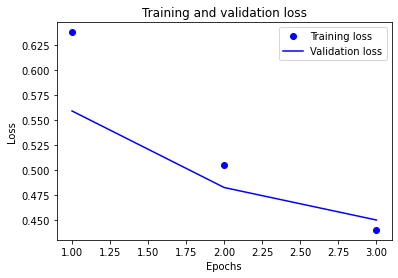

In [20]:
import matplotlib.pyplot as plt

acc = history_dict_rnn['accuracy']
val_acc = history_dict_rnn['val_accuracy']
loss = history_dict_rnn['loss']
val_loss = history_dict_rnn['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

epochs를 3으로 해야 하는 것인가.......?

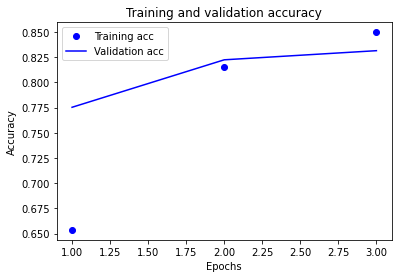

In [21]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 학습된 Embedding 레이어 분석

In [22]:
embedding_layer = model_rnn.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)## 학습된 Embedding 레이어 분석

(10000, 10)


In [23]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec_rnn.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model_rnn.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [25]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['사랑']
vector

array([-0.06938047, -0.02158226,  0.03809017, -0.06615193, -0.08299857,
        0.077985  , -0.03644361, -0.0190595 ,  0.12643503, -0.04267322],
      dtype=float32)

In [26]:
word_vectors.similar_by_word("사랑")

[('예술', 0.9569724798202515),
 ('떠나보내', 0.942481279373169),
 ('이래서', 0.9195802211761475),
 ('방식', 0.9082784056663513),
 ('스럽', 0.9046801328659058),
 ('남겼', 0.9039919376373291),
 ('오싹', 0.9032516479492188),
 ('충족', 0.8980161547660828),
 ('납치', 0.8951716423034668),
 ('섹스', 0.8926260471343994)]

# 2. 1-d CNN

## 모델 구성 및 validation set 구성

In [27]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 10  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

model_1dcnn = tf.keras.Sequential()
model_1dcnn.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_1dcnn.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_1dcnn.add(tf.keras.layers.MaxPooling1D(5))
model_1dcnn.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_1dcnn.add(tf.keras.layers.GlobalMaxPooling1D())
model_1dcnn.add(tf.keras.layers.Dense(8, activation='relu'))
model_1dcnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_1dcnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 10)          100000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          1136      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [28]:
# validation set 146182-100000=46182건 분리
x_val = x_train[100000:]   
y_val = y_train[100000:]

# validation set을 제외한 나머지 100000건
partial_x_train = x_train[:99999]  
partial_y_train = y_train[:99999]

print(partial_x_train.shape)
print(partial_y_train.shape)
print(x_val.shape, y_val.shape, )

(99999, 41)
(99999,)
(46182, 41) (46182,)


## 모델 훈련, 테스트

In [29]:
model_1dcnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=2  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history_1dcnn = model_1dcnn.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/2
196/196 [==============================] - 3s 6ms/step - loss: 0.5170 - accuracy: 0.7378 - val_loss: 0.3762 - val_accuracy: 0.8338
Epoch 2/2
196/196 [==============================] - 1s 5ms/step - loss: 0.3386 - accuracy: 0.8562 - val_loss: 0.3594 - val_accuracy: 0.8423


In [30]:
results = model_1dcnn.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.3605 - accuracy: 0.8448
[0.3604620099067688, 0.8448033928871155]


## Loss, Accuracy 그래프 시각화

In [31]:
history_dict_1dcnn = history_1dcnn.history
print(history_dict_1dcnn.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


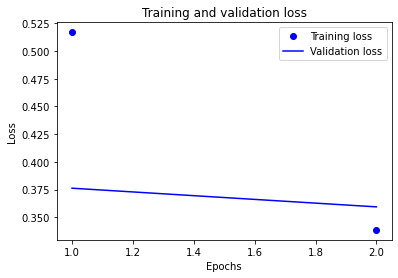

In [32]:
import matplotlib.pyplot as plt

acc = history_dict_1dcnn['accuracy']
val_acc = history_dict_1dcnn['val_accuracy']
loss = history_dict_1dcnn['loss']
val_loss = history_dict_1dcnn['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

epochs를 2로 해야 하는 것인가.......?

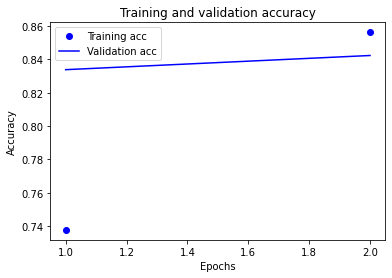

In [33]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 학습된 Embedding 레이어 분석

In [34]:
embedding_layer = model_1dcnn.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 10)


In [35]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec_1dcnn.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model_1dcnn.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [37]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['사랑']
vector

array([ 0.01146026,  0.04153695,  0.0429845 , -0.10371677, -0.02377801,
        0.01862645, -0.04870476,  0.022397  ,  0.05827581,  0.00217716],
      dtype=float32)

In [38]:
word_vectors.similar_by_word("사랑")

[('수수', 0.937704861164093),
 ('포스터', 0.9275620579719543),
 ('드릴', 0.9204841256141663),
 ('반전', 0.9187310934066772),
 ('보성', 0.9155116677284241),
 ('디게', 0.9119260311126709),
 ('이터', 0.9081748127937317),
 ('영구', 0.9064736366271973),
 ('여도', 0.9006767272949219),
 ('친한', 0.9006608128547668)]

# 3. Global Max Pooling 1d

## 모델 구성 및 validation set 구성

In [39]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 10  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

model_gmp = tf.keras.Sequential()
model_gmp.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_gmp.add(tf.keras.layers.GlobalMaxPooling1D())
model_gmp.add(tf.keras.layers.Dense(8, activation='relu'))
model_gmp.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_gmp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 10)          100000    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 100,097
Trainable params: 100,097
Non-trainable params: 0
_________________________________________________________________


In [40]:
# validation set 146182-100000=46182건 분리
x_val = x_train[100000:]   
y_val = y_train[100000:]

# validation set을 제외한 나머지 100000건
partial_x_train = x_train[:99999]  
partial_y_train = y_train[:99999]

print(partial_x_train.shape)
print(partial_y_train.shape)
print(x_val.shape, y_val.shape, )

(99999, 41)
(99999,)
(46182, 41) (46182,)


## 모델 훈련, 테스트

In [41]:
model_gmp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=5  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history_gmp = model_gmp.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/5
196/196 [==============================] - 1s 4ms/step - loss: 0.6571 - accuracy: 0.7185 - val_loss: 0.5743 - val_accuracy: 0.7737
Epoch 2/5
196/196 [==============================] - 1s 4ms/step - loss: 0.4697 - accuracy: 0.8107 - val_loss: 0.4194 - val_accuracy: 0.8201
Epoch 3/5
196/196 [==============================] - 1s 4ms/step - loss: 0.3745 - accuracy: 0.8428 - val_loss: 0.3874 - val_accuracy: 0.8284
Epoch 4/5
196/196 [==============================] - 1s 4ms/step - loss: 0.3383 - accuracy: 0.8565 - val_loss: 0.3775 - val_accuracy: 0.8331
Epoch 5/5
196/196 [==============================] - 1s 4ms/step - loss: 0.3152 - accuracy: 0.8675 - val_loss: 0.3744 - val_accuracy: 0.8347


In [42]:
results = model_gmp.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.3731 - accuracy: 0.8365
[0.37312382459640503, 0.8364831209182739]


## Loss, Accuracy 그래프 시각화

In [43]:
history_dict_gmp = history_gmp.history
print(history_dict_gmp.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


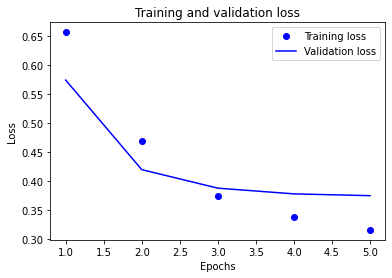

In [44]:
import matplotlib.pyplot as plt

acc = history_dict_gmp['accuracy']
val_acc = history_dict_gmp['val_accuracy']
loss = history_dict_gmp['loss']
val_loss = history_dict_gmp['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

epochs를 5로 해야 하는 것인가.......?

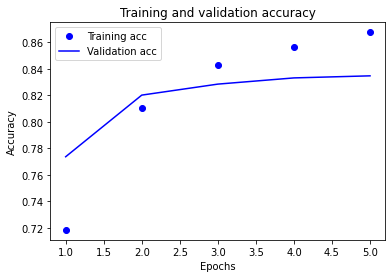

In [45]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 학습된 Embedding 레이어 분석

In [47]:
embedding_layer = model_gmp.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 10)


In [48]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec_gmp.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model_gmp.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [50]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['사랑']
vector

array([-0.06146161, -0.03468858, -0.04084171,  0.23339441, -0.06433972,
       -0.14807364, -0.05531995, -0.13139845, -0.0011717 , -0.0350836 ],
      dtype=float32)

In [51]:
word_vectors.similar_by_word("사랑")

[('청년', 0.9541645050048828),
 ('더러워', 0.9531354904174805),
 ('동성애', 0.9524900317192078),
 ('황당', 0.9523964524269104),
 ('다죠', 0.9477306008338928),
 ('울트라', 0.945654571056366),
 ('아무것', 0.9451218247413635),
 ('식', 0.9424355626106262),
 ('주변인', 0.9346771240234375),
 ('웃길려고', 0.9327155351638794)]

# 4. 한국어 Word2Vec 임베딩 활용하여 성능 개선

In [ ]:
#!pip install --upgrade gensim==3.8.3

In [52]:
import gensim
print(gensim.__version__)

3.8.3


In [53]:
import os
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/ko.bin'
word2vec = Word2Vec.load(word2vec_path)
vector = word2vec['사랑']
vector     # 무려 300dim의 워드 벡터입니다.

/tmp/ipykernel_563/2332792890.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector = word2vec['사랑']


array([-1.3740246 , -1.7353463 ,  3.3915305 , -2.569253  , -1.4016607 ,
        1.4556127 ,  0.9414557 ,  1.9207907 ,  0.16471806,  0.4838317 ,
       -0.8547181 ,  2.0879807 ,  0.86741775,  0.87539405, -0.09962013,
        0.22928311, -1.1858722 ,  0.00858838,  1.4999928 , -0.16196461,
       -0.35184434, -0.92390764,  1.0849575 ,  0.3025011 ,  2.7021565 ,
       -1.0263684 ,  0.32864776, -0.76589465, -2.510981  , -0.66225356,
        2.8434615 ,  0.50130975, -1.021874  , -1.4366034 ,  1.1110784 ,
        0.5812605 , -0.5830406 , -0.5785423 ,  1.3634988 ,  2.3074338 ,
       -1.4314893 ,  0.45745876,  1.1073523 , -3.2135262 , -0.2898375 ,
       -1.1622221 ,  1.2369208 , -0.7622987 , -0.37757635,  1.1376442 ,
        0.01065568, -0.69105595,  1.5159112 ,  1.1534518 , -1.0119992 ,
       -0.5757404 ,  1.1349088 , -1.1289831 ,  0.13004152,  2.0451715 ,
       -0.23940353,  1.3604902 ,  0.72700524,  0.32545742,  1.0612459 ,
        0.42252553,  1.1442151 ,  2.8774905 ,  2.4377263 , -1.34

In [54]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("사랑")

/tmp/ipykernel_563/1098788216.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  word2vec.similar_by_word("사랑")


[('슬픔', 0.7216662764549255),
 ('행복', 0.6759077310562134),
 ('절망', 0.6468985080718994),
 ('기쁨', 0.6458414196968079),
 ('이별', 0.6334798336029053),
 ('추억', 0.6320937275886536),
 ('인생', 0.6216273307800293),
 ('애정', 0.6206069588661194),
 ('연인', 0.6186063289642334),
 ('유혹', 0.5965287685394287)]

In [55]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 200  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/tmp/ipykernel_563/1730871920.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in word2vec:
/tmp/ipykernel_563/1730871920.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] = word2vec[index_to_word[i]]


In [56]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 200  # 워드 벡터의 차원 수 

# 모델 구성
model_w2v = tf.keras.Sequential()
model_w2v.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model_w2v.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_w2v.add(tf.keras.layers.MaxPooling1D(5))
model_w2v.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_w2v.add(tf.keras.layers.GlobalMaxPooling1D())
model_w2v.add(tf.keras.layers.Dense(8, activation='relu'))
model_w2v.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model_w2v.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 41, 200)           2000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 35, 16)            22416     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 16)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 16)             1808      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [57]:
# 학습의 진행
model_w2v.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=3  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history_w2v = model_w2v.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/3
196/196 [==============================] - 3s 8ms/step - loss: 0.5672 - accuracy: 0.6930 - val_loss: 0.4728 - val_accuracy: 0.7743
Epoch 2/3
196/196 [==============================] - 1s 7ms/step - loss: 0.4052 - accuracy: 0.8158 - val_loss: 0.3992 - val_accuracy: 0.8188
Epoch 3/3
196/196 [==============================] - 1s 7ms/step - loss: 0.3388 - accuracy: 0.8535 - val_loss: 0.3813 - val_accuracy: 0.8312


In [58]:
# 테스트셋을 통한 모델 평가
results = model_w2v.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.3827 - accuracy: 0.8320
[0.3827216327190399, 0.8320279717445374]


## Loss, Accuracy 그래프 시각화

In [59]:
history_dict_w2v = history_w2v.history
print(history_dict_w2v.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


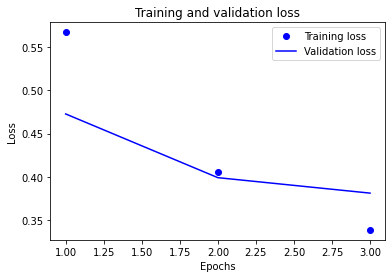

In [60]:
import matplotlib.pyplot as plt

acc = history_dict_w2v['accuracy']
val_acc = history_dict_w2v['val_accuracy']
loss = history_dict_w2v['loss']
val_loss = history_dict_w2v['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

epochs를 3으로 해야 하는 것인가.......?

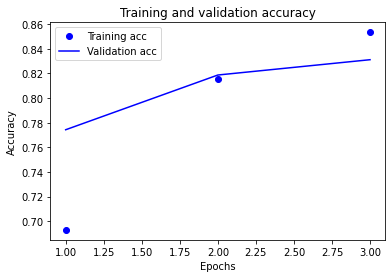

In [61]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 회고

#### 사용 모델 
RNN, 1dCNN, Global Max Pooling을 사용해 본 결과 테스트 어큐러시가 0.83~0.84정도로 나왔음.
그런데 gensim의 유사단어 찾기를 활용해보았을 때, 모두 '사랑'이라는 단어로 테스트 해 보았는데 전혀 뜬금없는 단어들이 나오기도 함..
사전학습된 w2v 임베딩에서는 똑같이 '사랑'으로 유사단어 찾기를 해 봤을 때 꽤나 비슷한 단어들이 나와서 좋은 결과를 기대했는데
최종 테스트 어큐러시는 0.83으로 비슷했음..

#### # of epochs
에포크를 처음에 디폴트로 모두 20으로 주고 시작했었는데, 모든 모델들에서 5정도가 넘어가면 validation accuracy가 급감하는 추세를 보였음..
그래서 결국 모든 모델에서 에포크를 2~5번만 돌리게 됨.

#### 감성분석
감성분석은 이미지분석과 좀 다르게 눈에 직관적으로 보이는 게 없어서 좀 더 어렵게 느껴지는 것 같음. 어떤 하이퍼파라미터를 조정해야 성능을 높일 수 있는지 알게 되려면 공부를 더 많이 해야할 것 같음 😭😭😭😭😭😭